<a href="https://colab.research.google.com/github/elimelt/python-scripts/blob/main/cool-algorithms/graph_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# utils for graph generation and visualization

def make_random_nx_graph(n, edge_probability):
  G = nx.Graph()

  nodes = list(range(n))
  G.add_nodes_from(nodes)
  for i in range(n):
      for j in range(i+1, n):
          if random.random() < edge_probability:
              w = 1 if random.random() < .5 else 2
              G.add_edges_from([(i, j, {"weight":  w})])
  return G

# Generate a random symmetric graph's adjacency matrix
# of vNum vertices, where all vertices have even degree.
def make_symmetric_graph(v):
    adjacency = [[0] * v for _ in range(v)]

    edgeNum = random.randint(0, v * (v - 1) // 2)

    for i in range(v):
        for j in range(i):
            adjacency[i][j] = random.randint(0, 1)
            adjacency[j][i] = adjacency[i][j]

        # if any row has odd sum, change one randomly
        if sum(adjacency[i]) % 2 != 0:
            selectedIndex = random.randint(0, i - 1)
            adjacency[i][selectedIndex] = 1 - adjacency[i][selectedIndex]
            adjacency[selectedIndex][i] = adjacency[i][selectedIndex]

    return adjacency

# Show nx.DiGraph using mpl
def show(graph):
    pos = nx.spring_layout(graph)  # Position nodes using the spring layout algorithm
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
    plt.show()

# Show nx.DiGraph from adjacency matrix using mpl
def show_matrix(adj_matrix):
    graph = nx.DiGraph()
    num_nodes = len(adj_matrix)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i][j] == 1:
                graph.add_edge(i, j)

    show(graph)

# Given G and some path of vertices through G, show G
# with said path highlighted in red
def show(G, path=[], title="graph"):
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

    colormap = "white"
    if len(path) > 1:
      # Draw the path in red
      path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
      nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=2.0, alpha=0.8, edge_color='red')
      pathset = set(path)
      colormap = ["red" if v in pathset else "blue" for v in G]

    nx.draw(G, pos, with_labels=True, node_size=50, node_color=colormap, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')
    plt.title(title)
    plt.show()

# visualize the graph for the given matrix with cycles colored differently.
def visualize(adjacency_matrix, cycles):
    G = nx.Graph()

    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] == 1:
                G.add_edge(i, j)

    plt.figure(figsize=(8, 6))
    pos = nx.kamada_kawai_layout(G)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    nx.draw_networkx_nodes(G, pos, node_size=300)
    nx.draw_networkx_edges(G, pos)

    for i, cycle in enumerate(cycles):
        cycle_edges = [(cycle[j], cycle[j + 1]) for j in range(len(cycle) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color=colors[i % len(colors)], width=2)

    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black", font_family="sans-serif")


    plt.title("Graph partitioned by cycles")
    plt.axis("off")
    plt.show()

In [54]:
# partitions edges of G into cycles
def partition_edges(G):

  G = [list(row) for row in G]

  if any([sum(row) % 2 == 1 for row in G]):
    return "Impossible"

  def next_cycle():
    vis = set()
    cycle_path = []

    def dfs(start, curr, path):
      nonlocal cycle_path

      if curr in vis:
        if len(path) > 2:
          cycle_path = list(path)
        return

      vis.add(curr)
      for i in range(len(G)):
        if G[curr][i] == 1 and (len(path) < 2 or i != path[-2]):
          path.append(i)
          dfs(start, i, path)
          path.pop()
      vis.remove(curr)

    dfs(1, 1, [1])
    idx = cycle_path.index(cycle_path[-1])
    assert(idx != len(cycle_path) - 1)
    if idx == 0:
      return cycle_path
    return cycle_path[idx:]

  edges_removed = 0
  total_edges = sum([sum(row) for row in G])/2
  cycles = []
  while edges_removed < total_edges:
    curr = next_cycle()
    cycles.append(curr)
    remove_path(G, curr)
    edges_removed += len(curr)

  return cycles

def remove_path(G, path):
    for i in range(1, len(path)):
      u, v = path[i - 1], path[i]
      assert(G[u][v] == 1 and G[v][u] == 1)
      G[u][v] = G[v][u] = 0

    return G

[0, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0]
[[8, 7, 6, 8], [8, 5, 7, 4, 8], [8, 3, 7, 2, 8], [1, 8, 0, 7, 1], [6, 5, 4, 6], [6, 3, 5, 2, 6], [1, 6, 0, 5, 1], [4, 3, 2, 4]]


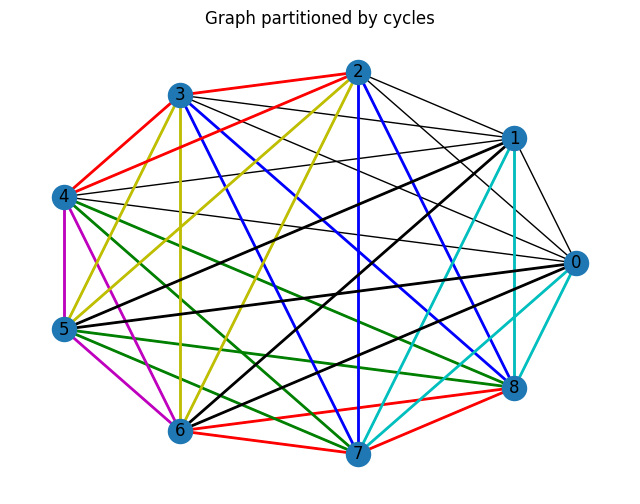

In [55]:
n = 9
graph = [
    [0 if i == j else 1 for j in range(n)] for i in range(n)
]

for row in graph:
  print(row)

cycles = partition_edges(graph)
print(cycles)
visualize(graph, cycles)


In [56]:
# An alternate (worse) implementation of the edge partitioning algorithm
# implemented above.

cycle = None

def find_first_non_zero(degrees):
    for i, degree in enumerate(degrees):
        if degree != 0:
            return i
    return None

def get_edges_from_path(path):
    edges = []
    curr = path.pop()
    while path:
        nxt = path.pop()
        edges.append((curr, nxt))
        curr = nxt
    return edges


def find_cycle(G, start, path, vis):
    global cycle
    if cycle is not None:
        return
    if start in vis:
        cycle = path.copy()
        return

    vis.add(start)

    for neighbor in range(len(G)):
        if G[start][neighbor] == 0:
            continue
        if len(path) > 1 and neighbor == path[-2]:
            continue
        path.append(neighbor)
        find_cycle(G, neighbor, path, vis)
        path.pop()


def partition_edges_bad(Gin):
    global cycle
    G = [list(row) for row in Gin]
    degrees = [sum(row) for row in G]
    if not all([d % 2 == 0 for d in degrees]):
        return "Impossible"

    degsum = sum(degrees)

    res = []
    while degsum > 0:
        v = find_first_non_zero(degrees)
        cycle = None
        find_cycle(G, v, [v], set())
        cycle_copy = cycle.copy()
        cycle_edges = get_edges_from_path(cycle)
        for u, v in cycle_edges:
            G[u][v] = 0
            G[v][u] = 0
            degrees[u] -= 1
            degrees[v] -= 1
        res.append(cycle_copy)
        degsum -= len(cycle_edges) * 2
    return res

[0, 1, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 1, 0]
[[0, 1, 2, 0], [0, 4, 2, 3, 1, 5, 0], [3, 4, 5, 3]]


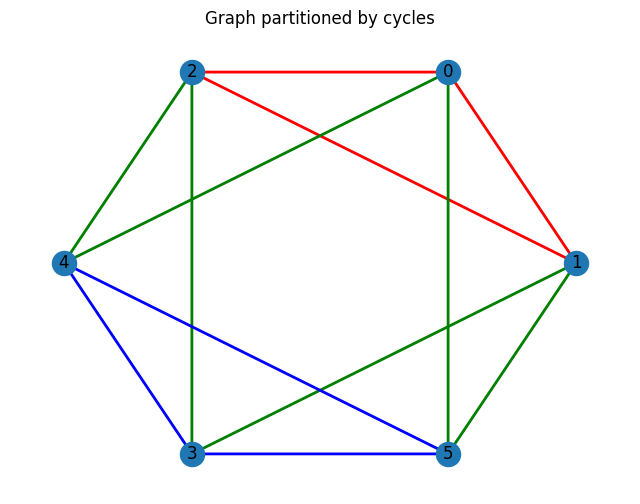

In [57]:
G = [
  [0, 1, 1, 0, 1, 1],
  [1, 0, 1, 1, 0, 1],
  [1, 1, 0, 1, 1, 0],
  [0, 1, 1, 0, 1, 1],
  [1, 0, 1, 1, 0, 1],
  [1, 1, 0, 1, 1, 0],
]

res = partition_edges_bad(G)
for row in G:
  print(row)

print(res)
visualize(G, res)

In [58]:
def visualize_4(adjacency_matrix):
    """
    Visualize a graph and add random 1s and 2s to each edge.

    Parameters:
    adjacency_matrix (list of list): 2D list representing the adjacency matrix of the graph.

    Returns:
    None
    """
    G = nx.Graph()

    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] == 1:
                G.add_edge(i, j)

    plt.figure(figsize=(8, 6))
    pos = nx.kamada_kawai_layout(G)  # positions for all nodes
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # cycle colors
    nx.draw_networkx_nodes(G, pos, node_size=300)
    nx.draw_networkx_edges(G, pos)


    nx.draw_networkx_edge_labels(
      G, pos
      edge_labels={ p: random.randint(1, 2) for p in pos },
      font_color='red'
    )


    # Display labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black", font_family="sans-serif")



    print(pos)
    plt.title("Graph partitioned by cycles")
    plt.axis("off")
    plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-58-8fd967384172>, line 26)

In [59]:
def cheapest_path_through_1_2_graph(G, s, t):

  s_BFS = bfs_tree(G, s)
  t_BFS = bfs_tree(G, t)

  s_costs = path_cost_map(s_BFS, s)
  t_costs = path_cost_map(t_BFS, t)

  min_cost, min_v = float('inf'), None

  for v in s_costs:

    if s_costs[v] * t_costs[v] < min_cost:
      min_v = v
      min_cost = s_costs[v] * t_costs[v]

  s_to_v = path_to(s_BFS, s, min_v, set())
  t_to_v = path_to(t_BFS, t, min_v, set())

  return s_to_v + t_to_v[::-1][1:]

def bfs_tree(graph, source):
    bfs_tree = nx.Graph()
    visited = set()
    queue = [(source, None)]  # (node, parent)
    visited.add(source)

    while queue:
        node, parent = queue.pop(0)
        if parent is not None:
            bfs_tree.add_edge(parent, node, weight=graph[parent][node]['weight'])
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, node))

    return bfs_tree

def path_cost_map(graph, source):

  def dfs(source, curr_cost, costs, vis):
    if source in vis:
      return

    vis.add(source)
    costs[source] = curr_cost
    for nxt in graph.neighbors(source):
      cost = graph.get_edge_data(source, nxt)["weight"]
      dfs(nxt, curr_cost * cost, costs, vis)


  costs = {}
  dfs(source, 1, costs, set())
  return costs


def path_to(graph, source, dest, vis):
  if source in vis:
    return []

  if source == dest:
    return [source]

  vis.add(source)

  for nxt in graph.neighbors(source):
      path = path_to(graph, nxt, dest, vis)

      if path:
        return [source] + path




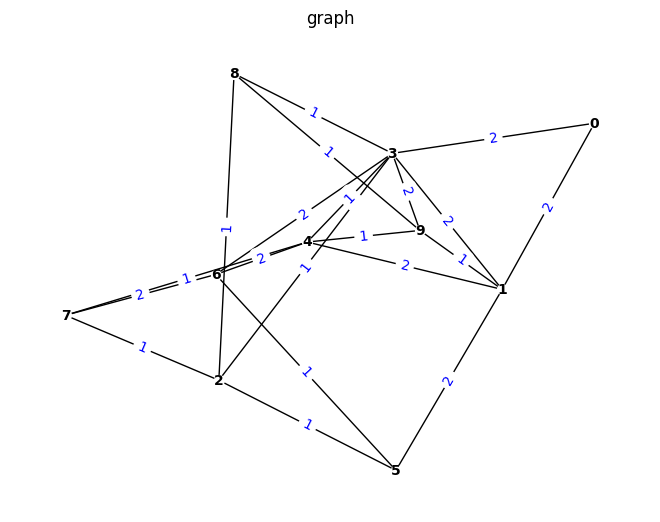

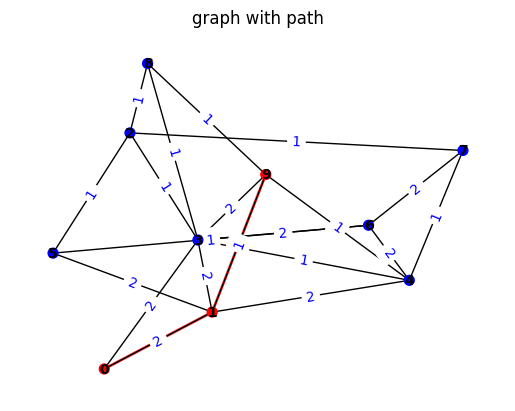

In [60]:
G = nx.Graph()
nodes = list(range(10))  # 20 nodes
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        if random.random() < .4:
            weight = random.randint(1, 2)  # Random weight 1 or 2
            G.add_edge(nodes[i], nodes[j], weight=weight)


show(G)
path = cheapest_path_through_1_2_graph(G, 0, 9)


show(G, path=path, title="graph with path")

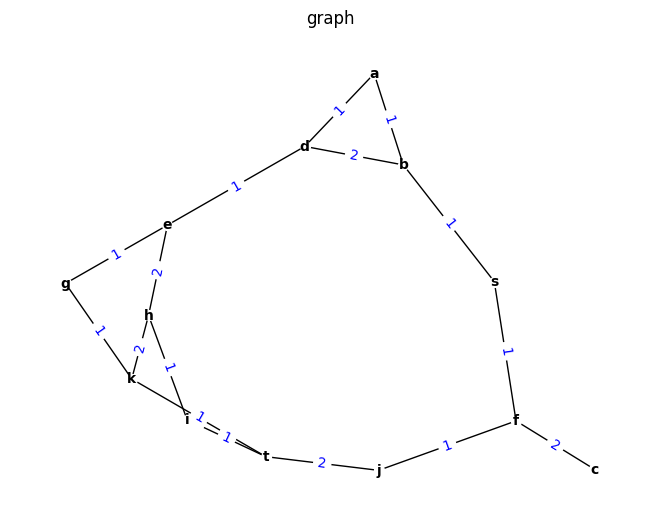

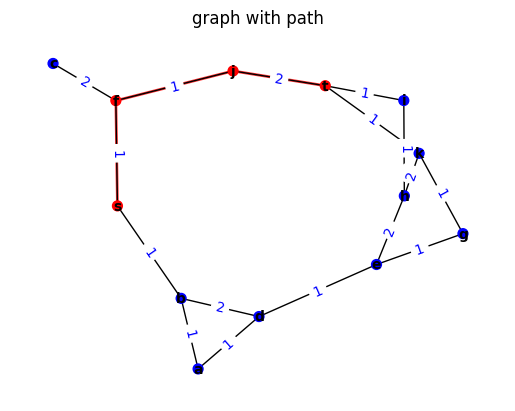

In [61]:
g = nx.Graph()

g.add_edges_from([('s', 'b', {'weight': 1}),
                  ('b', 'a', {'weight': 1}),
                  ('a', 'd', {'weight': 1}),
                  ('d', 'e', {'weight': 1}),
                  ('e', 'g', {'weight': 1}),
                  ('g', 'k', {'weight': 1}),
                  ('h', 'i', {'weight': 1}),
                  ('f', 'j', {'weight': 1}),
                  ('s', 'f', {'weight': 1}),
                  ('i', 't', {'weight': 1}),
                  ('c', 'f', {'weight': 2}),
                  ('j', 't', {'weight': 2}),
                  ('h', 'k', {'weight': 2}),
                  ('e', 'h', {'weight': 2}),
                  ('d', 'b', {'weight': 2}),
                  ('k', 't', {'weight': 1})])


show(g)
path = cheapest_path_through_1_2_graph(g, 's', 't')


show(g, path=path, title="graph with path")

In [62]:
# Returns the connected component
# associative array for the vertices
# of graph
def connected_components(graph):
  a = [None] * len(graph)

  def bfs(label, G, src):
    q = deque()
    vis = set()

    q.append(src)
    while q:
      curr = q.popleft()
      vis.add(curr)
      a[curr] = label
      for v in G[curr]:
        if v not in vis:
          q.append(v)

  curr_label = 0

  for v in range(len(graph)):
    bfs(curr_label, graph, v)
    curr_label += 1
  return a


def component_sets(G):
  n = len(G)
  comp = connected_components(G)
  component_dict = defaultdict(lambda: set())
  for v, c in enumerate(comp):
    component_dict[c].add(v)

  return list(component_dict.values())

def make_random_graph(n, edge_probability):
  G = [list() for _ in range(n)]

  nodes = list(range(n))
  for i in range(n):
      for j in range(i+1, n):
          if random.random() < edge_probability:
              G[i].append(j)
              G[j].append(i)
  return G


In [63]:
G = make_random_graph(10, .1)
print(G)
print(component_sets(G))

[[], [6, 9], [5, 9], [5], [], [2, 3], [1], [], [], [1, 2]]
[{0}, {1, 2, 3, 5, 6, 9}, {4}, {7}, {8}]


In [64]:
from collections import deque, defaultdict

# Given a weighted graph with edges of weight 1 or 2,
# and two vertices s and t, finds the shortest weight
# path between s and t, where the weight of a path is
# the product of edge weights. Runs in O(|V| + |E|)!

# This one was hard...

# This version displays the intermediate graphs produced
# during the algorithm.
def lowest_weight_path_in_1_2_graph(g, s, t):
  G = remove_edges_with_weight(g, 2)
  comp = connected_components(G)
  components = defaultdict(lambda: set())
  show(g)
  show(G)
  for v, c in comp.items():
    components[c].add(v)

  c_graph = nx.Graph()
  c_graph.add_nodes_from(components.keys())

  comp_edges = defaultdict(lambda: {})

  for u, v in g.edges:
    if g.get_edge_data(u, v)["weight"] == 2:
      comp_edges[comp[u]][comp[v]] = (u, v)
      comp_edges[comp[v]][comp[u]] = (v, u)

      if not c_graph.has_edge(comp[u], comp[v]):
        c_graph.add_edge(comp[u], comp[v], weight=2)

  s_c = comp[s]
  t_c = comp[t]

  if s_c == t_c:
    return shortest_path_bfs(G, s, t)

  c_path = shortest_path_bfs(c_graph, s_c, t_c)
  c_path_edges = [(None, s)]
  for i in range(1, len(c_path)):
    u, v = c_path[i - 1], c_path[i]
    c_path_edges.append(comp_edges[u][v])

  c_path_edges.append((t, None))

  path = []

  for i in range(1, len(c_path_edges)):
    u, c1 = c_path_edges[i - 1]
    c2, v = c_path_edges[i]

    path.extend(shortest_path_bfs(G, c1, c2))

  return path

def remove_edges_with_weight(g, weight):
  G = g.copy()
  remove = []
  for v in G:
    for u in G.neighbors(v):
      if G.get_edge_data(u, v)["weight"] == weight:
        remove.append((u, v))

  G.remove_edges_from(remove)
  return G

def shortest_path_bfs(g, src, dst):
  if src == dst:
        return [src]

  q = deque([(src, [src])])
  visited = set()

  while q:
      node, path = q.popleft()

      if node == dst:
          return path

      if node not in visited:
          visited.add(node)
          for neighbor in g.neighbors(node):
              q.append((neighbor, path + [neighbor]))

  return None  # no path exists

def connected_components(g):
  def bfs(G, src, label, a, vis):
    q = deque()

    q.append(src)
    while q:
      curr = q.popleft()
      vis.add(curr)
      a[curr] = label
      for v in G.neighbors(curr):
        if v not in vis:
          q.append(v)

  l = 0
  a = {}
  vis = set()
  for v in g:
    if v not in vis:
      bfs(g, v, l, a, vis)
      l += 1
  return a

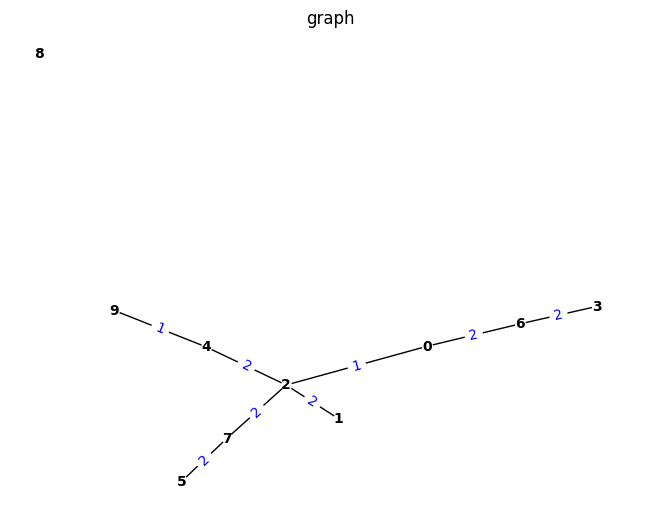

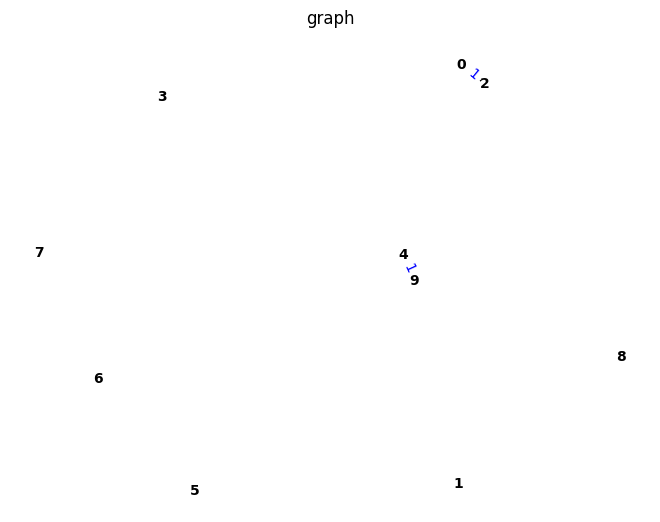

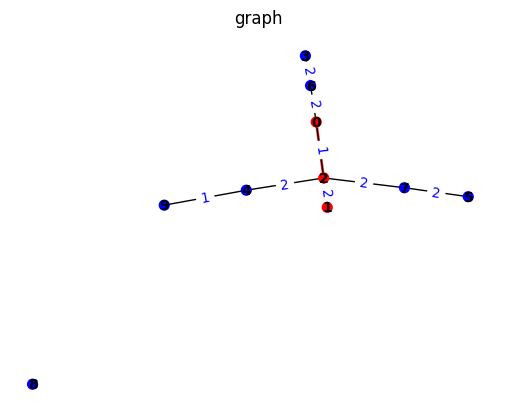

In [65]:
g = make_random_nx_graph(10, .2)

path = lowest_weight_path_in_1_2_graph(g, 0, 1)
show(g, path=path)

In [66]:
# Pretty self explanatory IMO.

# Given undirected graph, orients edges such that there are
# no source vertices, ie v such that in_deg(v) == 0
def orient_edges_for_no_source(adj_matrix):
  G = [list(row) for row in adj_matrix]
  u, v = find_cycle_dfs(G, 0, None, set())

  G[u][v] = G[v][u] = 0

  orient_edges_away_dfs(G, u, set())
  G[v][u] = 1
  return G

def find_cycle_dfs(G, s, back, vis):
  if s in vis:
    return s, back

  vis.add(s)
  for u in range(len(G[s])):
    if G[s][u] == 0 or back == u:
      continue

    cycle = find_cycle_dfs(G, u, s, vis)
    if cycle is not None:
      return cycle

  return None

def orient_edges_away_dfs(G, s, vis):
  if s in vis:
    return

  vis.add(s)
  for u in range(len(G[s])):
    if G[s][u] == 0:
      continue

    G[u][s] = 0
    orient_edges_away_dfs(G, u, vis)

In [68]:
# Algorithm to color a graph with k colors
# Works so long as for all v, deg(v) <= k, and
# there exists some v with deg(v) < k
def color(G, k):
  v = find_any_v_deg_lt(G, k)
  colors = [None] * len(G)
  color_recursive(G, v, colors, k, set())
  return colors


def color_recursive(G, v, colors, k, vis):
  if v in vis:
    return

  if sum(G[v]) == 0:
    colors[v] = 0

  vis.add(v)
  edges = list(G[v])
  e_rem = []
  for u in range(len(G[v])):
    if G[u][v] == 0:
      continue

    G[v][u] = 0
    G[u][v] = 0
    e_rem.append((u, v))
    e_rem.append((v, u))


  G[v] = [0] * len(G[v])
  nc = { i for i in range(k) }
  for u in range(len(G[v])):
    if edges[u] == 0:
      continue

    color_recursive(G, u, colors, k, vis)
    if colors[u] in nc:
      nc.remove(colors[u])

  colors[v] = nc.pop()

  for u, v in e_rem:
    G[u][v] = 1


def find_any_v_deg_lt(G, k):
  for i, row in enumerate(G):
    if sum(row) < k:
      return i

In [70]:
# Given a directed graph G with vertices labeled 1, ..., n
# Outputs the smallest labeled vertex reachable for each
# vertex in O(|V| + |E|)
def min_reachable(G):
  vis = set()
  min_r = list(range(len(G)))
  for v in range(len(G)):
    min_dfs(G, v, min_r, vis)
  return min_r

def min_dfs(G, v, min_r, vis):
  if v in vis:
    return min_r[v]

  vis.add(v)
  min_r[v] = v
  for u in range(len(G)):
    if G[v][u] == 0:

      continue

    min_r[v] = min(min_r[v], min_dfs(G, u, min_r, vis))

  return min_r[v]



def reverse_edges(G):
  newG = { v:[] for v in G }

  for u in G:
    for v in G[u]:
      newG[v].append(u)

  return newG

def dfs(G, s, m, min_r, vis):
  if s in vis:
    return

  vis.add(s)
  for u in G[s]:
    if u not in vis:
      min_r[u] = min(min_r[s], u)
      dfs(G, u, min_r[s], min_r, vis)


def min_reachable_rev(G):
  G = reverse_edges(G)
  vis = set()
  min_r = { v: v for v in G }
  for v in G:
    dfs(G, v, min_r[v], min_r, vis)

  return min_r


In [71]:
G = {
    1: [5],
    2: [1],
    3: [6],
    4: [2],
    5: [],
    6: [4]
}

print(min_reachable_rev(G))

{1: 1, 2: 1, 3: 1, 4: 1, 5: 5, 6: 1}
